<a href="https://colab.research.google.com/github/umbcfloodbot/FloodBot/blob/main/1_Twitter_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install pydub

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections

import tweepy as tw
import nltk
from nltk import bigrams
from nltk.corpus import stopwords
import re
import networkx as nx

import warnings
warnings.filterwarnings("ignore")

#sns.set(font_scale=1.5)
#sns.set_style("whitegrid")
import cv2
import numpy as np
import os
import pandas as pd
import platform
import sqlalchemy
#import mysql.connector
import requests
import json
from pandas.io.json import json_normalize
import time
import librosa
import matplotlib.pyplot as plt
import IPython.display as ipd
import librosa
import librosa.display
import warnings
warnings.filterwarnings("ignore")
from pydub import AudioSegment
from moviepy.editor import *
import subprocess
import os
import sys
from moviepy.editor import *

Imageio: 'ffmpeg-linux64-v3.3.1' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/ffmpeg/ffmpeg-linux64-v3.3.1 (43.8 MB)
Downloading: 8192/45929032 bytes (0.0%)3063808/45929032 bytes (6.7%)5996544/45929032 bytes (13.1%)9003008/45929032 bytes (19.6%)11919360/45929032 bytes (26.0%)14983168/45929032 bytes (32.6%)17719296/45929032 bytes (38.6%)20725760/45929032 bytes (45.1%)24043520/45929032 bytes (52.3%)27459584/45929032 bytes (59.8%)30605312/45929032 bytes (66.6%)33865728/45929032 bytes (73.7%)37281792/45929032 bytes (81.2%)

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
directory = "/content/drive/My Drive/thesis_work/floodbot_tweet/code"
weather_csv =  "/content/drive/My Drive/thesis_work/weather_csv/"
trim_directory = "/content/drive/My Drive/thesis_work/trim/"
orig_image_dir = "/content/drive/My Drive/thesis_work/orig/"
os.chdir(directory)

Mounted at /content/drive


In [ ]:
from datetime import datetime
now = datetime.now()
today_dt=now.strftime("%Y%m%d%H")

In [ ]:
import glob
path = r'/content/drive/My Drive/thesis_work/floodbot_tweet'
all_files = glob.glob(path + "/*.csv")
df_files = (pd.read_csv(f) for f in all_files)
df_tweet_impr   = pd.concat(df_files, ignore_index=True)

In [ ]:
import glob
path = r'/content/drive/My Drive/thesis_work/audio/PhD_Thesis/data/weather_data'
all_files = glob.glob(path + "/*.txt")
df_files = (pd.read_csv(f) for f in all_files)
df_weather   = pd.concat(df_files, ignore_index=True)

In [ ]:
df_weather = df_weather[['Date time','Wind Speed','Wind Gust','Visibility','Cloud Cover','Precipitation','Conditions']]
df_weather['Date_time']= pd.to_datetime(df_weather['Date time'])
df_weather['Date_time']=df_weather['Date_time'].astype(str)

In [ ]:
df_weather['Date_time']=df_weather['Date_time'].str[:-3]
df_weather = df_weather.drop_duplicates()
df_weather['Rain_Date'] = pd.to_datetime(df_weather['Date_time'], format='%Y-%m-%d %H:%M')
df_weather.set_index("Rain_Date", inplace=True)

In [ ]:
df_accum_rain = df_weather.groupby(df_weather.index.date).sum()
df_accum_rain.reset_index(inplace=True)
df_accum_rain = df_accum_rain.rename(columns = {'index':'Day'})
df_daily_rain = df_weather.resample('D').sum()
df_daily_rain['Day'] = df_daily_rain.index

In [ ]:
df_tweet_impr = df_tweet_impr[['Tweet id', 'Tweet permalink', 'Tweet text', 'time', 'impressions',
       'engagements', 'engagement rate', 'retweets', 'replies', 'likes',
       'user profile clicks', 'url clicks', 'hashtag clicks', 'detail expands',
       'permalink clicks', 'app opens', 'app installs', 'follows',
       'email tweet', 'dial phone', 'media views', 'media engagements']]


In [ ]:
df_tweet_impr.head(2)

,Tweet id,Tweet permalink,Tweet text,time,impressions,engagements,engagement rate,retweets,replies,likes,user profile clicks,url clicks,hashtag clicks,detail expands,permalink clicks,app opens,app installs,follows,email tweet,dial phone,media views,media engagements
0,1189663343377817601,https://twitter.com/umbc_floodbot/status/11896...,Temperature reading at Hamilton Street Parking...,2019-10-30 22:00 +0000,120.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0
1,1189572771522777088,https://twitter.com/umbc_floodbot/status/11895...,Temperature reading at Hamilton Street Parking...,2019-10-30 16:00 +0000,125.0,2.0,0.016,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0


In [ ]:
df_tweet_impr['date'] = pd.to_datetime(df_tweet_impr['time'])

In [ ]:
df_tweet_impr.dtypes

Tweet id                             int64
Tweet permalink                     object
Tweet text                          object
time                                object
impressions                        float64
engagements                        float64
engagement rate                    float64
retweets                           float64
replies                            float64
likes                              float64
user profile clicks                float64
url clicks                         float64
hashtag clicks                     float64
detail expands                     float64
permalink clicks                   float64
app opens                            int64
app installs                         int64
follows                              int64
email tweet                          int64
dial phone                           int64
media views                          int64
media engagements                    int64
date                   datetime64[ns, UTC]
dtype: obje

In [ ]:
from datetime import date,datetime,timedelta

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import pandas as pd

# Handle date time conversions between pandas and matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [ ]:
df_tweet_impr.set_index('date', inplace=True)

In [ ]:
df_tweet_impr.head(2)

,Tweet id,Tweet permalink,Tweet text,time,impressions,engagements,engagement rate,retweets,replies,likes,user profile clicks,url clicks,hashtag clicks,detail expands,permalink clicks,app opens,app installs,follows,email tweet,dial phone,media views,media engagements
date,,,,,,,,,,,,,,,,,,,,,,
2019-10-30 22:00:00+00:00,1189663343377817601,https://twitter.com/umbc_floodbot/status/11896...,Temperature reading at Hamilton Street Parking...,2019-10-30 22:00 +0000,120.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0
2019-10-30 16:00:00+00:00,1189572771522777088,https://twitter.com/umbc_floodbot/status/11895...,Temperature reading at Hamilton Street Parking...,2019-10-30 16:00 +0000,125.0,2.0,0.016,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0


In [ ]:
#df_daily = df_tweet_impr[df_tweet_impr.groupby(['time'])['Tweet id'].count()]
df_daily = df_tweet_impr.groupby('time', as_index = False)['Tweet id'].count()

In [ ]:
df_daily['Tweet_Time'] = df_daily['time']
df_daily['time'] = pd.to_datetime(df_daily['time'])
df_daily['Dates'] = pd.to_datetime(df_daily['time'], format='%y%m%d')

In [ ]:
df_daily.head(2)

,time,Tweet id,Tweet_Time,Dates
0,2019-10-06 03:51:00+00:00,1,2019-10-06 03:51 +0000,2019-10-06 03:51:00+00:00
1,2019-10-06 19:48:00+00:00,1,2019-10-06 19:48 +0000,2019-10-06 19:48:00+00:00


In [ ]:
df_daily.set_index('time', inplace=True)

In [ ]:
df_monthly = df_daily.resample('M').sum()

In [ ]:
df_monthly['Month'] = df_monthly.index
df_monthly['Mnths'] = pd.to_datetime(df_monthly['Month'], format='%y%m%d')
df_monthly.reset_index(level=0, inplace=True)

In [ ]:
df_monthly.head(3)


,time,Tweet id,Month,Mnths
0,2019-10-31 00:00:00+00:00,107,2019-10-31 00:00:00+00:00,2019-10-31 00:00:00+00:00
1,2019-11-30 00:00:00+00:00,100,2019-11-30 00:00:00+00:00,2019-11-30 00:00:00+00:00
2,2019-12-31 00:00:00+00:00,58,2019-12-31 00:00:00+00:00,2019-12-31 00:00:00+00:00


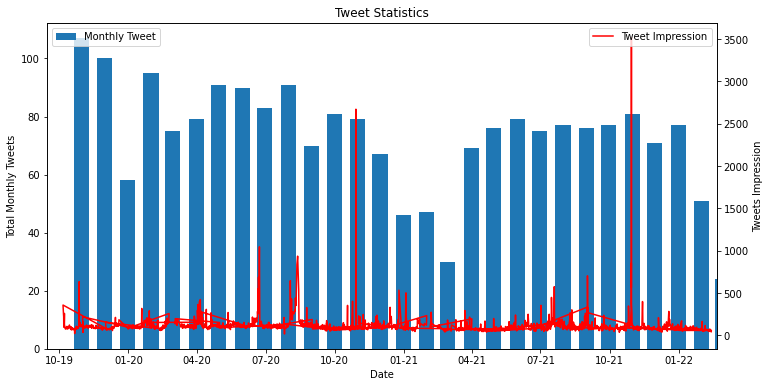

In [ ]:
import matplotlib.dates as mdates
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import argrelextrema
from matplotlib.dates import DateFormatter

# Create figure and plot space
fig, ax = plt.subplots(figsize=(12, 6))
ax2=ax.twinx()

# Add x-axis and y-axis
ax.bar(df_monthly['Mnths'],
       df_monthly['Tweet id'],
        width=20,label='Monthly Tweet')


peak_data = df_tweet_impr['2019-09-15':'2022-02-22']
#f, ax = plt.subplots(figsize=(10, 6))
x=peak_data.index.values
y=peak_data['impressions']
ax2.plot(x,y,color='red',label='Tweet Impression')
peak_data['min'] = peak_data.iloc[argrelextrema(peak_data.impressions.values, np.less_equal,
                    order=n)[0]]['impressions']
peak_data['max'] = peak_data.iloc[argrelextrema(peak_data.impressions.values, np.greater_equal,
                    order=n)[0]]['impressions']

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Total Monthly Tweets",
       title="Tweet Statistics",
       xlim=["2019-09-15", "2022-02-20"],
       ) 

ax2.set(
       ylabel="Tweets Impression"
             ) 
# Define the date format
date_form = DateFormatter("%m-%y")
ax2.xaxis.set_major_formatter(date_form)
ax2.legend(loc="upper right")
ax.legend(loc="upper left")
# Turns off grid on the left Axis.
ax.grid(False)
ax2.grid(False)
# Turns off grid on the secondary (right) Axis.
# Ensure a major tick for each week using (interval=1) 
ax2.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.show()

In [ ]:
#https://www.earthdatascience.org/courses/use-data-open-source-python/use-time-series-data-in-python/date-time-types-in-pandas-python/customize-dates-matplotlib-plots-python/

In [ ]:
peak_data = df_tweet_impr['2020-08-20':'2020-08-27']

In [ ]:
peak_data.head(@)

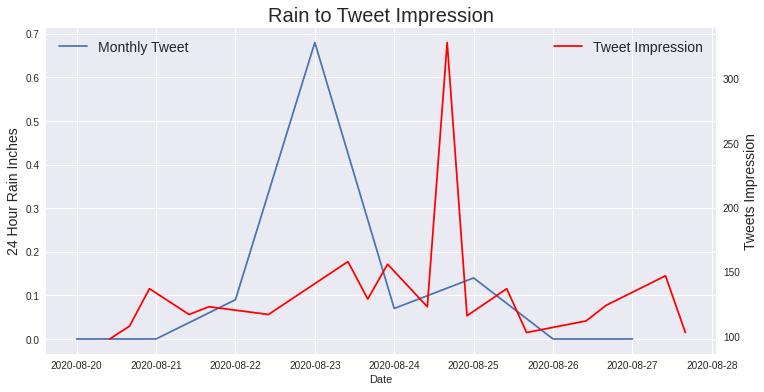

In [ ]:
import matplotlib.dates as mdates
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import argrelextrema
from matplotlib.dates import DateFormatter

#plt.rcParams['font.family'] = 'serif'
#plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
plt.style.use(['seaborn'])

#legend = ax.legend(loc=0, ncol=1, bbox_to_anchor=(0, 0, 1, 1),
          # prop = fontP,fancybox=True,shadow=False,title='LEGEND')

# Create figure and plot space
fig, ax = plt.subplots(figsize=(12, 6))
ax2=ax.twinx()

df_weather_select = df_daily_rain['2020-08-20':'2020-08-27']
# Add x-axis and y-axis
ax.plot(df_weather_select['Day'],
       df_weather_select['Precipitation'],
        label='Monthly Tweet')


peak_data = df_tweet_impr['2020-08-20':'2020-08-27']
#f, ax = plt.subplots(figsize=(10, 6))
x=peak_data.index.values
y=peak_data['impressions']
ax2.plot(x,y,color='red',label='Tweet Impression')
peak_data['min'] = peak_data.iloc[argrelextrema(peak_data.impressions.values, np.less_equal,
                    order=n)[0]]['impressions']
peak_data['max'] = peak_data.iloc[argrelextrema(peak_data.impressions.values, np.greater_equal,
                    order=n)[0]]['impressions']

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="24 Hour Rain Inches"
      # title="Tweet Statistics"
       #xlim=['2020-08-20', '2020-08-27'],
       ) 

#ax2.set(ylabel="Tweets Impression", fontsize=14             ) 

# set labels and font size
#ax2.set_xlabel('X axis', fontsize = 12)
ax2.set_ylabel('Tweets Impression', fontsize = 14)
ax.set_ylabel('24 Hour Rain Inches', fontsize = 14)
# Define the date format
date_form = DateFormatter("%y-%m-%d")
#ax2.xaxis.set_major_formatter(date_form)
ax2.legend(loc="upper right",prop={"size":14})
ax.legend(loc="upper left", prop={"size":14})
# Turns off grid on the left Axis.
#ax.grid(False)
ax2.grid(False)
# Turns off grid on the secondary (right) Axis.
# Ensure a major tick for each week using (interval=1) 
ax2.xaxis.set_major_locator(mdates.DayLocator(interval=1))
plt.title("Rain to Tweet Impression",
          fontsize = 20)
#plt.legend(["blue", "orange"], prop={"size":20})

plt.show()

In [ ]:
# Importing the 5 files
flood='/content/drive/My Drive/thesis_work/audio/PhD_Thesis/data/ppr_presnt/1_Rec_20200812_222438_151_M.wav'
y_flood, sr_flood = librosa.load(flood)
audio_flood, _ = librosa.effects.trim(y_flood)
# the result is an numpy ndarray
print('Audio File:', audio_flood, '\n')
print('Audio File shape:', np.shape(audio_flood))

Audio File: [-0.0017904  -0.00238565 -0.0014677  ...  0.00357559  0.00141064
 -0.00129709] 

Audio File shape: (44100,)


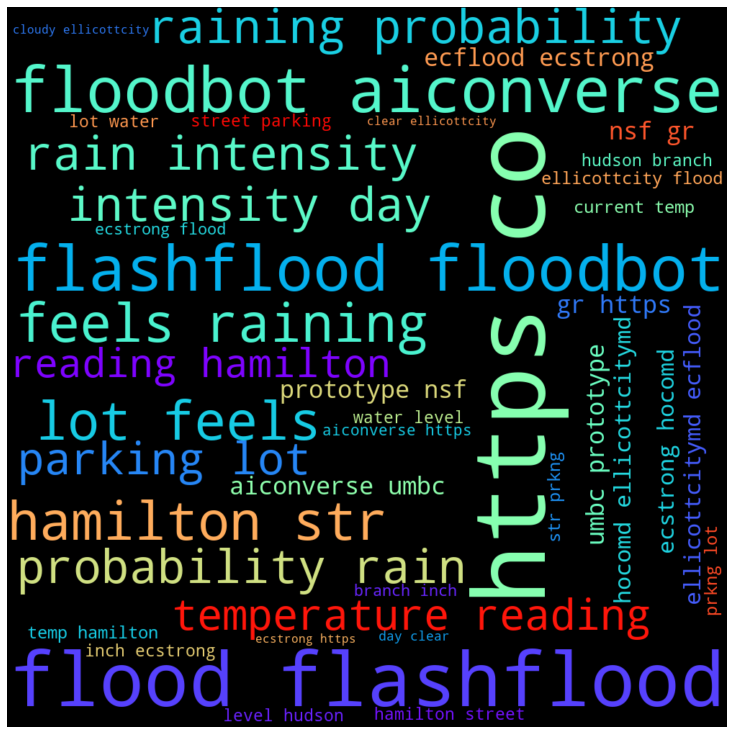

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
df=df_tweet_impr

comment_words=' '
stopwords=set(STOPWORDS)

for val in df['Tweet text']:
    val=str(val)
    tokens=val.split()
    for i in range(len(tokens)):
        tokens[i]=tokens[i].lower()
    for words in tokens:
        comment_words=comment_words+words+' '
#mask = np.array(Image.open('/content/drive/My Drive/thesis_work/floodbot_tweet/code/howard_twtr_bkgrnd.png'))
wordcloud=WordCloud(width=1000,height=1000, background_color='black', stopwords=stopwords,min_font_size=15,colormap='rainbow').generate(comment_words)

plt.figure(figsize=(10,10),facecolor=None)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

In [ ]:
import tweepy
import datetime

In [ ]:
#Twitter API credentials
consumer_key = "c4fCgLhilNJN2YS7PGPCIZSOi"
consumer_secret = "K1aDTNJzakRQP7faKe0AvyjVjKURkLZymAKteE6RogtI5HhfUf"
access_key = "1173295284874596358-WiX7NNt9MYq5gX0BTwNadXMmH0hpyE"
access_secret = "zOiM3ft6Sy8xVNaxIVjoylt6NHl4fFxBvr6DN2b6gBQFd"

In [ ]:
class TweetMiner(object):

    result_limit    =   3000   
    data            =   []
    api             =   False
    
    twitter_keys = {
        'consumer_key':        'c4fCgLhilNJN2YS7PGPCIZSOi',
        'consumer_secret':     'K1aDTNJzakRQP7faKe0AvyjVjKURkLZymAKteE6RogtI5HhfUf',
        'access_token_key':    '1173295284874596358-WiX7NNt9MYq5gX0BTwNadXMmH0hpyE',
        'access_token_secret': 'zOiM3ft6Sy8xVNaxIVjoylt6NHl4fFxBvr6DN2b6gBQFd'
    }
    
    
    def __init__(self, keys_dict=twitter_keys, api=api, result_limit = 20):
        
        self.twitter_keys = keys_dict
        
        auth = tweepy.OAuthHandler(keys_dict['consumer_key'], keys_dict['consumer_secret'])
        auth.set_access_token(keys_dict['access_token_key'], keys_dict['access_token_secret'])
        
        self.api = tweepy.API(auth)
        self.twitter_keys = keys_dict
        
        self.result_limit = result_limit
        

    def mine_user_tweets(self, user="umbc_floodbot", #BECAUSE WHO ELSE!
                         mine_rewteets=False,
                         max_pages=50):

        data           =  []
        last_tweet_id  =  False
        page           =  1
        
        while page <= max_pages:
            if last_tweet_id:
                statuses   =   self.api.user_timeline(screen_name=user,
                                                     count=self.result_limit,
                                                     max_id=last_tweet_id - 1,
                                                     tweet_mode = 'extended',
                                                     include_retweets=True
                                                    )        
            else:
                statuses   =   self.api.user_timeline(screen_name=user,
                                                        count=self.result_limit,
                                                        tweet_mode = 'extended',
                                                        include_retweets=True)
                
            for item in statuses:
              

                mined = {
                    'tweet_id':        item.id,
                    'name':            item.user.name,
                    'screen_name':     item.user.screen_name,
                    'retweet_count':   item.retweet_count,
                    'text':            item.full_text,
                    'mined_at':        datetime.datetime.now(),
                    'created_at':      item.created_at,
                    'favourite_count': item.favorite_count,
                    'hashtags':        item.entities['hashtags'],
                    'status_count':    item.user.statuses_count,
                    'location':        item.place,
                    'source_device':   item.source
                }
                
                try:
                    mined['retweet_text'] = item.retweeted_status.full_text
                except:
                    mined['retweet_text'] = 'None'
                try:
                    mined['quote_text'] = item.quoted_status.full_text
                    mined['quote_screen_name'] = status.quoted_status.user.screen_name
                except:
                    mined['quote_text'] = 'None'
                    mined['quote_screen_name'] = 'None'
                
                last_tweet_id = item.id
                data.append(mined)
                
            page += 1
            
        return data 

In [ ]:
miner=TweetMiner(result_limit = 5000 )

In [ ]:
mined_tweets = miner.mine_user_tweets(user='umbc_floodbot', max_pages=50)

In [ ]:
mined_tweets_df= pd.DataFrame(mined_tweets)

In [ ]:
#mined_tweets_df['retweet_count']
mined_tweets_df.sort_values(by=['favourite_count'], ascending=False)

,tweet_id,name,screen_name,retweet_count,text,mined_at,created_at,favourite_count,hashtags,status_count,location,source_device,retweet_text,quote_text,quote_screen_name
234,1454171032919674892,UMBC Flood Bot,umbc_floodbot,2,Double Flood Monitoring #flooding #ellicottcit...,2022-02-17 10:50:47.780225,2021-10-29 19:39:26,12,"[{'text': 'flooding', 'indices': [24, 33]}, {'...",2140,None,Twitter for iPhone,None,None,None
1246,1290619588242280449,UMBC Flood Bot,umbc_floodbot,1,Weary Morning.Hope we all stay safe! https://t...,2022-02-17 10:50:52.447529,2020-08-04 12:04:23,5,[],2140,Place(_api=<tweepy.api.API object at 0x7f21157...,Twitter for Android,None,None,None
1813,1218575083507265536,UMBC Flood Bot,umbc_floodbot,0,Pretty psyched about this one. I used to able ...,2022-02-17 10:50:56.729409,2020-01-18 16:45:14,5,[],2140,Place(_api=<tweepy.api.API object at 0x7f21157...,Twitter for Android,None,None,None
972,1332440508170432513,UMBC Flood Bot,umbc_floodbot,0,FloodBot is always learning and expanding it's...,2022-02-17 10:50:50.544057,2020-11-27 21:45:47,5,[],2140,None,Twitter Web App,None,None,None
1231,1294091559009386497,UMBC Flood Bot,umbc_floodbot,3,Looking Back Yesterday ... Pretty Rough Day ht...,2022-02-17 10:50:52.447470,2020-08-14 02:00:45,5,[],2140,None,Twitter Web App,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1012,1325030323596517376,UMBC Flood Bot,umbc_floodbot,0,Temperature reading at Hamilton Str. Parking L...,2022-02-17 10:50:51.453078,2020-11-07 11:00:21,0,"[{'text': 'ECStrong', 'indices': [167, 176]}, ...",2140,None,umbc_floodbot,None,None,None
1011,1325120928414535680,UMBC Flood Bot,umbc_floodbot,0,Temperature reading at Hamilton Str. Parking L...,2022-02-17 10:50:51.453074,2020-11-07 17:00:23,0,"[{'text': 'ECStrong', 'indices': [165, 174]}, ...",2140,None,umbc_floodbot,None,None,None
1009,1325211522746998784,UMBC Flood Bot,umbc_floodbot,0,Temperature reading at Hamilton Str. Parking L...,2022-02-17 10:50:51.453065,2020-11-07 23:00:22,0,"[{'text': 'ECStrong', 'indices': [167, 176]}, ...",2140,None,umbc_floodbot,None,None,None
1008,1325392715970998283,UMBC Flood Bot,umbc_floodbot,0,Temperature reading at Hamilton Str. Parking L...,2022-02-17 10:50:51.453061,2020-11-08 11:00:22,0,"[{'text': 'ECStrong', 'indices': [171, 180]}, ...",2140,None,umbc_floodbot,None,None,None
